In [24]:
# !pip install plotly
# !pip install cufflinks

In [25]:
import pandas as pd
import cufflinks as cf
import plotly.offline as plyo

In [30]:
plyo.init_notebook_mode(connected=True)

In [31]:
sp5 = pd.read_csv("../data/sp500.csv", index_col="DATE")
sp5.shape

(2424, 2)

In [32]:
sp5.head()

,sp500,change
DATE,,
2012-04-20,1378.53,0.001169
2012-04-23,1366.94,-0.008443
2012-04-24,1371.97,0.003673
2012-04-25,1390.69,0.013552
2012-04-26,1399.98,0.006658


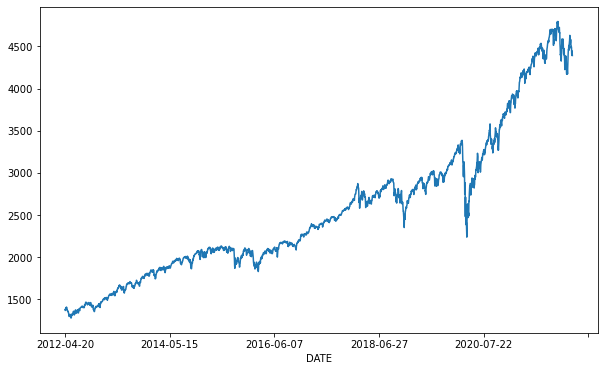

In [33]:
sp5["sp500"].plot(figsize=(10,6));

In [39]:
plyo.iplot(
    sp5.iplot(asFigure=True)
)

In [73]:
def get_stats(df, sym, window):
    data = df.copy()
    data['min'] = data[sym].rolling(window=window).min()
    data['mean'] = data[sym].rolling(window=window).mean() 
    data['std'] = data[sym].rolling(window=window).std()
    data['median'] = data[sym].rolling(window=window).median()
    data['max'] = data[sym].rolling(window=window).max()
    data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
    return data

In [74]:
window = 20
sp5_df = get_stats(sp5, "sp500", 20)

In [75]:
sp5_df.shape, sp5.shape

((2424, 8), (2424, 8))

In [76]:
sp5_df

,sp500,change,min,mean,std,median,max,ewma
DATE,,,,,,,,
2012-04-20,1378.53,0.001169,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-23,1366.94,-0.008443,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-24,1371.97,0.003673,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-25,1390.69,0.013552,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-26,1399.98,0.006658,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-04-08,4488.28,-0.002655,4173.11,4481.1850,111.423624,4505.91,4631.6,4490.947867
2022-04-11,4412.53,-0.017021,4262.45,4493.1560,86.701685,4505.91,4631.6,4432.134467
2022-04-12,4397.45,-0.003423,4357.86,4499.9060,71.763350,4505.91,4631.6,4406.121117


In [77]:
def plot_data(data, sym):
    ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
        figsize=(10,6), style=['g--', 'r--', 'g--'], lw=0.8
    )
    data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

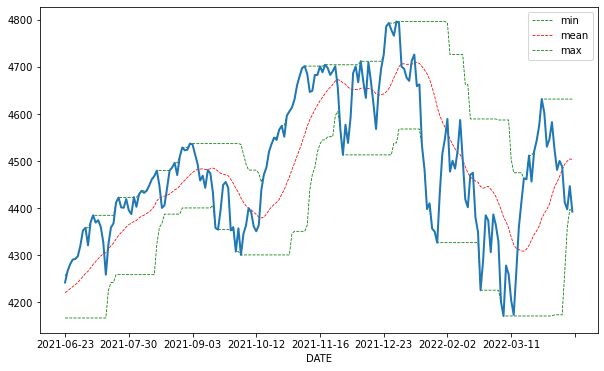

In [78]:
plot_data(sp5_df, 'sp500')

### Technical Analysis

In [105]:
wshort, wlong = 50, 200
periods = 365 * 2
spm30 = get_stats(sp5, "sp500", window=wshort).iloc[-periods:]
spm200 = get_stats(sp5, "sp500", window=wlong).iloc[-periods:]

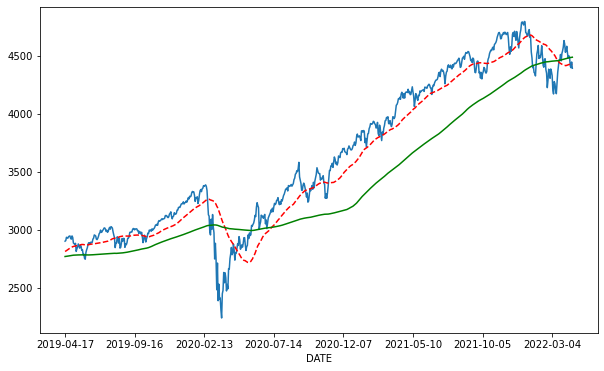

In [106]:
ax = sp5['sp500'].iloc[-periods:].plot(figsize=(10,6))
spm30['mean'].plot(ax=ax, style=['r--'])
spm200['mean'].plot(ax=ax, style=['g']);